<center><h1>Mineria de Datos</header1></center>

Presentado por: Javier Granda, Bismark Castro, Noelia Anchundia - Grupo 8 <br>
Lider: Javier Granda  <br>
Fecha: 16/08/2022

# Importación de librerias necesarias

In [ ]:
#Para esta actividad se importarán las siguientes librerías:

"""Librerias y modulos para el analisis de datos"""
import numpy as np 
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

#Modules for Machine Learning and Data Preprocessing
from tensorflow import keras
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
%matplotlib inline

## Cargar el Dataset

In [19]:
#Código para cargar el Dataset
df = pd.read_csv('data.csv')

## Descripción de la fuente del Dataset

In [ ]:
https://www.kaggle.com/code/nandalald/bankruptcy-prediction-using-ann-f1-score-97/notebook


Haga una descripción de la fuente de dayos utilizada (Incluya los enlaces necesarios).

## Explique el problema a resolver. 
Descripción del problema. Tipo de problema (justifique). Variable objetivo, variables de entrada. Utilidad de su posible solución. Elementos adicionales que considere relevantes (no son necesarios contenidos teóricos, sino explicar qué relaciones tratas de comprobar y con qué métodos).

## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.


In [20]:
'''Número de instancias en total.'''
df.shape
'''Número de atributos de entrada, su significado y tipo.'''
df.shape
'''Estadísticas de la variable objetivo.'''
df.shape
'''Número de instancias en total.'''
df.shape

(6819, 96)

En un par de párrafos haga un resumen de los principales hallazagos encontrados:    

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [21]:
#Transformación de las caracteristicas (mire el apartado Feature engineering del aula virtual)

"""Haremos una escala para los datos, ya que 
solo queremos usar datos con un rango de 0 a 1.
Con ayuda de la funcion max()>1 para que no pase
de ese valor."""

colum = df.max()[df.max()>1]
colum

 Operating Expense Rate                   9.990000e+09
 Research and development expense rate    9.980000e+09
 Interest-bearing debt interest rate      9.900000e+08
 Revenue Per Share (Yuan ¥)               3.020000e+09
 Total Asset Growth Rate                  9.990000e+09
 Net Value Growth Rate                    9.330000e+09
 Current Ratio                            2.750000e+09
 Quick Ratio                              9.230000e+09
 Total debt/Total net worth               9.940000e+09
 Accounts Receivable Turnover             9.740000e+09
 Average Collection Days                  9.730000e+09
 Inventory Turnover Rate (times)          9.990000e+09
 Fixed Assets Turnover Frequency          9.990000e+09
 Revenue per person                       8.810000e+09
 Allocation rate per person               9.570000e+09
 Quick Assets/Current Liability           8.820000e+09
 Cash/Current Liability                   9.650000e+09
 Inventory/Current Liability              9.910000e+09
 Long-term

In [ ]:
"""Del mismo modo para que nos datos no sean menores a 0
con ayuda de la funcion min()<0."""
df.min()[df.min()<0]

Series([], dtype: float64)

Como se observa, no se tienen columas con valores menores que 0, por lo que se procedera a usar la funcion MinMaxScalar para realizar el Feature engineering a nuestro dataset.

In [22]:
"""Se instancia la funcion MinMaxScaler y se hace uso de la funcion 
fit_transform para distribuir los valores en un rango de 0 a 1"""

scale = MinMaxScaler()
scalled = scale.fit_transform(df[colum.keys()])

In [24]:
"""Se recorre el array de la columna creada en busca de los 
datos para escalar y se asignan los nuevos valores con la 
variable de MinMaxScaler previamente creada."""

i = 0
for col in colum.keys():
    df[col] = scalled[:,i]
    i += 1

In [25]:
"""Se muestran los datos estadisicos ya estandarizados 
para tener un contraste con los datos sin estandarizar 
para tener un mejor analisis de estos."""

df[colum.keys()].describe()

,Operating Expense Rate,Research and development expense rate,Interest-bearing debt interest rate,Revenue Per Share (Yuan ¥),Total Asset Growth Rate,Net Value Growth Rate,Current Ratio,Quick Ratio,Total debt/Total net worth,Accounts Receivable Turnover,...,Allocation rate per person,Quick Assets/Current Liability,Cash/Current Liability,Inventory/Current Liability,Long-term Liability to Current Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Cash Turnover Rate,Fixed Assets to Assets,Total assets to GNP price
count,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,...,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03
mean,1.997345e-01,1.954336e-01,1.661415e-02,4.399472e-04,0.551361,1.678684e-04,1.466491e-04,9.075401e-04,4.442995e-04,1.313111e-03,...,1.176153e-03,4.073585e-04,3.850777e-03,5.631363e-03,5.677153e-03,1.195856e-01,2.163735e-01,2.471977e-01,1.466491e-04,1.897089e-03
std,3.240925e-01,2.603499e-01,1.093687e-01,1.712155e-02,0.290062,1.223573e-02,1.210987e-02,2.650972e-02,1.694234e-02,2.856877e-02,...,3.077391e-02,1.945815e-02,5.288610e-02,5.873376e-02,5.977679e-02,2.821161e-01,3.374944e-01,2.938623e-01,1.210987e-02,3.833504e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.568443e-14,1.284448e-14,2.050710e-13,5.175954e-12,0.486486,4.726355e-14,2.747290e-12,5.120155e-13,3.025200e-13,7.290899e-14,...,4.305673e-13,5.940789e-13,2.044567e-13,3.191875e-13,0.000000e+00,1.456236e-14,1.417149e-14,2.735337e-14,1.025966e-11,9.201838e-14
50%,2.780369e-14,5.100200e-02,3.242749e-13,9.064806e-12,0.640641,4.951292e-14,3.849882e-12,8.030847e-13,5.579763e-13,9.936454e-14,...,8.196837e-13,8.967005e-13,5.081748e-13,6.556342e-13,2.069831e-13,1.987816e-14,2.247728e-14,1.080000e-01,2.366359e-11,2.123435e-13
75%,4.149149e-01,3.456914e-01,5.379326e-13,1.535007e-11,0.739740,5.352220e-14,5.916192e-12,1.327097e-12,9.329268e-13,1.493593e-13,...,1.569520e-12,1.468357e-12,1.327002e-12,1.124800e-12,9.440195e-13,4.525945e-14,4.900000e-01,4.510000e-01,4.473557e-11,5.366372e-13
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [27]:
"""Por ultimo comprobamos el dataset para saber si la scala tuvo exito o no."""
df.sample(10)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
1102,0,0.509384,0.562800,0.556936,0.613341,0.613341,0.999054,0.797486,0.809397,0.303515,...,0.811072,1.467869e-13,0.623482,0.613339,0.841611,0.283031,0.027010,0.566024,1,0.021826
5858,0,0.548871,0.613389,0.605439,0.599324,0.599338,0.999018,0.797519,0.809431,0.303648,...,0.835290,6.097726e-13,0.624580,0.599325,0.842915,0.278597,0.026903,0.565641,1,0.034952
1609,0,0.514064,0.571686,0.556025,0.607042,0.607042,0.999056,0.797470,0.809369,0.303482,...,0.817060,1.402637e-13,0.623708,0.607040,0.842043,0.281735,0.026966,0.565875,1,0.023956
4860,0,0.560523,0.605102,0.600835,0.615071,0.614761,0.999174,0.797612,0.809485,0.303485,...,0.834311,9.343685e-14,0.624064,0.615073,0.842645,0.277852,0.026802,0.565211,1,0.040762
1907,0,0.569103,0.596925,0.601959,0.617824,0.617824,0.999182,0.797646,0.809496,0.303526,...,0.833573,7.122999e-14,0.623950,0.617821,0.842411,0.277148,0.026799,0.565196,1,0.049478
5779,0,0.577292,0.634649,0.620376,0.608253,0.608246,0.999081,0.797578,0.809465,0.303621,...,0.848214,2.326454e-13,0.624002,0.608255,0.843327,0.277128,0.026791,0.565159,1,0.049796
4161,0,0.499829,0.558221,0.547995,0.600535,0.600535,0.998993,0.797421,0.809340,0.303531,...,0.812579,7.823458e-13,0.623989,0.600532,0.841407,0.279911,0.026971,0.565890,1,0.028743
4200,0,0.604982,0.653020,0.636169,0.603281,0.603281,0.999084,0.797546,0.809427,0.303558,...,0.860446,2.345620e-13,0.624351,0.603276,0.845163,0.279512,0.026803,0.565215,1,0.030271
4802,0,0.515868,0.575938,0.561593,0.601717,0.601717,0.998999,0.797428,0.809342,0.303530,...,0.816743,2.605469e-12,0.623986,0.601716,0.842609,0.285864,0.026869,0.565505,1,0.018888
1608,0,0.490274,0.475687,0.522619,0.564739,0.564739,0.998295,0.796458,0.808445,0.303308,...,0.758891,9.754311e-13,0.623718,0.564734,0.837783,0.276844,0.026702,0.564697,1,0.054984


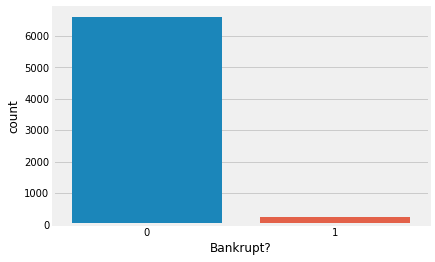

In [28]:
"""Con ayuda de la libreria de Seaborn, observamos y 
analizamos la columna de quiebra o bancarrota de las empresas."""
sns.countplot(x=df['Bankrupt?'])
plt.show()

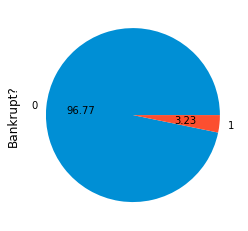

In [31]:
"""El grafico anterior nos identifica un dataset desbalanceado, pues los datos 
de bancarrota 1 para la variable objetivo son muy pocos. Por esto observamos mediante 
un grafico de procentajes para analizar este factor."""

df['Bankrupt?'].value_counts().plot(kind='pie',autopct="%.2f")
plt.show()

In [29]:
"""Del mismo modo analizamos el conteo de estos datos."""
df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

Se observa que el dataset esta totalmente desbalanceado, pues los casos de bancarrota son muy pocos en comparacion con los de no bancarrota, es por esto que se utilizara un metodo para balancear estos datos. El metodo elegido por su eficiencia y rapidez sera la libreria smote para el balanceo de datos.

In [32]:
"""Observamos todos los datos de X y de Y"""

x, y = df.drop('Bankrupt?',axis=1),df['Bankrupt?']
x.shape,y.shape

((6819, 95), (6819,))

In [34]:
"""Se utiliza la herramienta de smote con el hiperparametro de 
minority para que balancee los datos que tengan menos samples."""

smote = SMOTE(sampling_strategy='minority')
x,y = smote.fit_resample(x,y)
x.shape,y.shape

((13198, 95), (13198,))

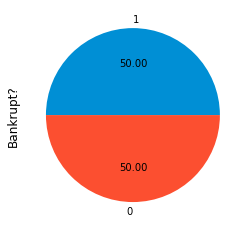

In [35]:
"""Analizamos el conteo de la variable Y para saber si se realizo un balanceo correcto"""

y.value_counts().plot(kind='pie',autopct="%.2f")
plt.show()

Se observa un correcto ajuste de los datos, pues ahora tenemos la misma cantidad de datos para 1 y 0 en donde el modelo podra entrenarse de manera optima con todos los samples.

## División del dataset en datos de entrenamiento y datos de test 

In [36]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evaluación planeada. Describa cuál es.

"""Se realizara la division de los datos en 4 partes con ayuda de la funcion train_test_split"""
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((9238, 95), (3960, 95), (9238,), (3960,))

## Modelamiento

In [37]:
#Codigo del modelo

"""El modelo utilizado para la prediccion en este caso sera una red neuronal artificial de dos capas.
Una de las capas con la funcion de activacion ReLu para las 95 caracteristicas encontradas y la otra
capa con la funcion de activacion Sigmoid la cual se activa con la variable objetivo. Asimismo se 
compila el modelo con la optimizacion del conjunto de datos ADAM y que indique el acurracy en sus ciclos
de entrenamiento. Por ultimo se utilizara la funcion de binary_crossentropy ya que es un problema de 
clasificacion binaria."""

ann = keras.Sequential([
    keras.layers.Dense(95,input_shape=(95,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

ann.compile(
    optimizer='adam',
    metrics=['accuracy'],
    loss='binary_crossentropy'
)

In [ ]:
#Entrenamiento

"""Se realiza """
model.fit(x_train,y_train,epochs=200)

In [ ]:
#Test

## Evaluación del Modelo

Construya un o dos párrafos con los principales hallazgos. Cómo está funcionando el modelo? Calidad en los resultados de predicción. 

# Interpretación de Resultados